<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/KID0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 题目描述

给定一个整数数组 `nums` 和一个目标值 `target`，请你在该数组中找出和为目标值的那 **两个** 整数，并返回他们的数组下标。

你可以假设每种输入只会对应一个答案。但是，你不能重复利用这个数组中同样的元素。

**示例:**

```
给定 nums = [2, 7, 11, 15], target = 9

因为 nums[0] + nums[1] = 2 + 7 = 9
所以返回 [0, 1]
```

### 题目解析

使用查找表来解决该问题。

设置一个 map 容器 record 用来记录元素的值与索引，然后遍历数组 nums。

* 每次遍历时使用临时变量 complement 用来保存目标值与当前值的差值
* 在此次遍历中查找 record ，查看是否有与 complement 一致的值，如果查找成功则返回查找值的索引值与当前变量的值 i
* 如果未找到，则在 record 保存该元素与索引值 i


In [1]:
def two_sum(nums, target):
    # 初始化一个空的哈希表
    hash_table = {}
    # 遍历数组中的每个元素
    for i, num in enumerate(nums):
        # 计算差值
        complement = target - num
        # 检查差值是否已经在哈希表中
        if complement in hash_table:
            # 如果存在，返回差值对应的下标和当前元素的下标
            return [hash_table[complement], i]
        # 如果不存在，将当前元素加入哈希表
        hash_table[num] = i
    # 如果没有找到符合条件的两个数，返回空列表（根据题目不会发生这种情况）
    return []

# 示例测试
nums = [2, 7, 11, 15]
target = 9
print(two_sum(nums, target))  # 输出: [0, 1]


[0, 1]


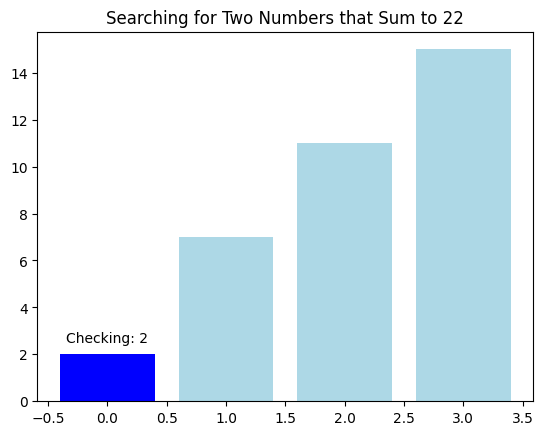

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

def two_sum(nums, target):
    """
    Finds two numbers in a list that add up to the target.

    Args:
        nums: A list of integers.
        target: The target sum.

    Returns:
        A list containing the indices of the two numbers, or an empty list if no such pair is found.
    """
    num_map = {}  # Dictionary to store numbers and their indices
    for index, num in enumerate(nums):
        complement = target - num
        if complement in num_map:
            return [num_map[complement], index]  # Found the pair!
        num_map[num] = index  # Store the current number and its index
    return []  # No solution found

# Input data
nums = [2, 7, 11, 15]
target = 22

# Find the solution
result = two_sum(nums, target)

# Animation function
def animate(i):
    ax.clear()
    ax.bar(range(len(nums)), nums, color='lightblue')  # All numbers in light blue
    ax.set_title(f"Searching for Two Numbers that Sum to {target}")

    if i < len(nums):
        ax.bar(i, nums[i], color='blue')  # Highlight the current number
        ax.text(i, nums[i] + 0.5, f"Checking: {nums[i]}", ha='center')  # Display text above the bar
        complement = target - nums[i]
        if complement in nums and nums.index(complement) != i:
          ax.bar(nums.index(complement), complement, color='green')
          ax.text(nums.index(complement), complement + 0.5, f"Found Complement: {complement}", ha='center')  # Display text above the bar
    else:
        if result:
            ax.bar(result[0], nums[result[0]], color='red')  # Highlight the first number in red
            ax.bar(result[1], nums[result[1]], color='red')  # Highlight the second number in red
            ax.text(result[0], nums[result[0]] + 0.5, f"Index: {result[0]}", ha='center')  # Display text above the bar
            ax.text(result[1], nums[result[1]] + 0.5, f"Index: {result[1]}", ha='center')  # Display text above the bar
            ax.set_title(f"Solution Found: Indices {result[0]} and {result[1]}")
        else:
            ax.set_title("No Solution Found")

# Create the animation
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, frames=len(nums) + 1, repeat=False, interval=1000) # frames=len(nums)+1 to include the last step after the loop

# Display the animation in Colab
HTML(ani.to_html5_video())

### 题目描述

给出两个 **非空** 的链表用来表示两个非负的整数。其中，它们各自的位数是按照 **逆序** 的方式存储的，并且它们的每个节点只能存储 **一位** 数字。

如果，我们将这两个数相加起来，则会返回一个新的链表来表示它们的和。

您可以假设除了数字 0 之外，这两个数都不会以 0 开头。

**示例：**

```
输入：(2 -> 4 -> 3) + (5 -> 6 -> 4)
输出：7 -> 0 -> 8
原因：342 + 465 = 807
```

### 题目解析

设立一个表示进位的变量`carried`，建立一个新链表，把输入的两个链表从头往后同时处理，每两个相加，将结果加上`carried`后的值作为一个新节点到新链表后面。

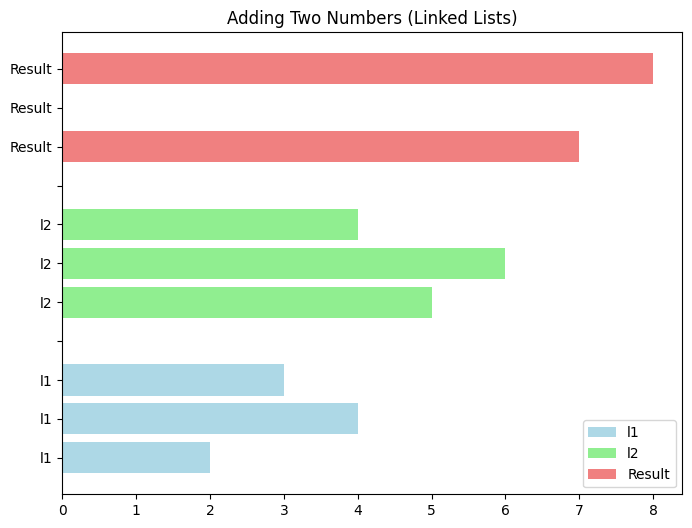

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def addTwoNumbers(l1, l2):
    """
    Adds two numbers represented by linked lists.

    Args:
        l1: The first linked list.
        l2: The second linked list.

    Returns:
        The head of the linked list representing the sum.
    """
    dummy = ListNode(0)  # Dummy node for the result list
    current = dummy
    carry = 0

    while l1 or l2 or carry:
        val1 = l1.val if l1 else 0
        val2 = l2.val if l2 else 0
        total = val1 + val2 + carry

        carry = total // 10
        current.next = ListNode(total % 10)
        current = current.next

        l1 = l1.next if l1 else None
        l2 = l2.next if l2 else None

    return dummy.next  # Return the head of the result list

# Create linked lists for the input numbers
l1 = ListNode(2, ListNode(4, ListNode(3)))
l2 = ListNode(5, ListNode(6, ListNode(4)))

# Calculate the sum
result = addTwoNumbers(l1, l2)

# Function to convert linked list to a list for visualization
def linked_list_to_list(head):
    values = []
    while head:
        values.append(head.val)
        head = head.next
    return values

# Animation function
def animate(i):
    ax.clear()
    ax.set_title("Adding Two Numbers (Linked Lists)")

    l1_values = linked_list_to_list(l1)
    l2_values = linked_list_to_list(l2)
    result_values = linked_list_to_list(result)

    # Display linked lists as horizontal bars
    ax.barh(np.arange(len(l1_values)), l1_values, color='lightblue', label="l1")
    ax.barh(np.arange(len(l2_values)) + len(l1_values) + 1, l2_values, color='lightgreen', label="l2")
    ax.barh(np.arange(len(result_values)) + len(l1_values) + len(l2_values) + 2, result_values, color='lightcoral', label="Result")

    ax.set_yticks(np.arange(len(l1_values) + len(l2_values) + len(result_values) + 2))
    ax.set_yticklabels(['l1'] * len(l1_values) + [''] + ['l2'] * len(l2_values) + [''] + ['Result'] * len(result_values))

    ax.legend()

# Create the animation
fig, ax = plt.subplots(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=1, repeat=False, interval=1000)  # Only one frame for static visualization

# Display the animation in Colab
HTML(ani.to_html5_video())

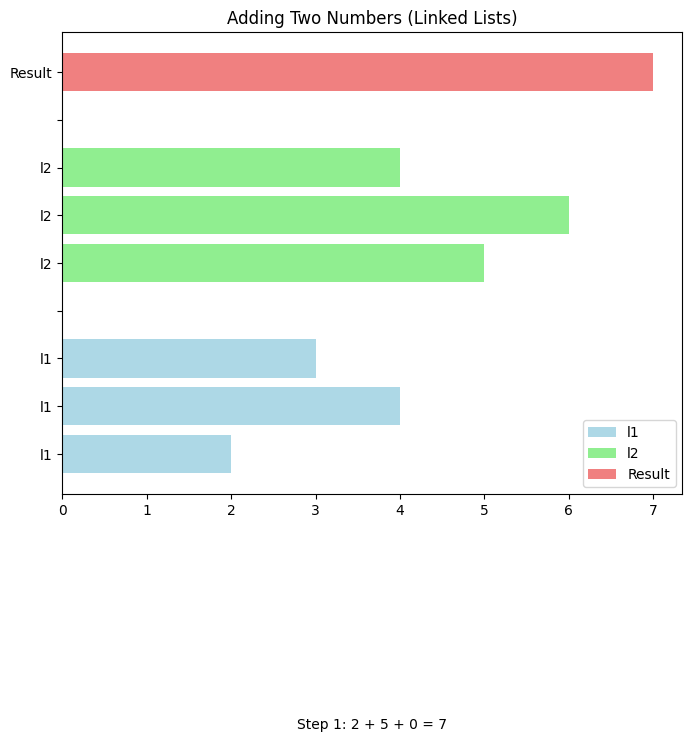

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def addTwoNumbers(l1, l2):
    dummy = ListNode(0)
    current = dummy
    carry = 0
    animation_frames = []  # To store data for each animation frame

    while l1 or l2 or carry:
        val1 = l1.val if l1 else 0
        val2 = l2.val if l2 else 0
        total = val1 + val2 + carry

        carry = total // 10
        current.next = ListNode(total % 10)
        current = current.next

        # Store data for the current frame
        animation_frames.append({
            "l1": linked_list_to_list(l1),
            "l2": linked_list_to_list(l2),
            "result": linked_list_to_list(dummy.next),
            "carry": carry,
            "val1": val1,
            "val2": val2,
            "total": total,
        })

        l1 = l1.next if l1 else None
        l2 = l2.next if l2 else None

    return dummy.next, animation_frames

def linked_list_to_list(head):
    values = []
    while head:
        values.append(head.val)
        head = head.next
    return values

# Create linked lists
l1 = ListNode(2, ListNode(4, ListNode(3)))
l2 = ListNode(5, ListNode(6, ListNode(4)))

# Calculate the sum and get animation frames
result, animation_frames = addTwoNumbers(l1, l2)

# Animation function
def animate(i):
    ax.clear()
    ax.set_title("Adding Two Numbers (Linked Lists)")

    frame_data = animation_frames[i]
    l1_values = frame_data["l1"]
    l2_values = frame_data["l2"]
    result_values = frame_data["result"]

    # Display linked lists
    ax.barh(np.arange(len(l1_values)), l1_values, color='lightblue', label="l1")
    ax.barh(np.arange(len(l2_values)) + len(l1_values) + 1, l2_values, color='lightgreen', label="l2")
    ax.barh(np.arange(len(result_values)) + len(l1_values) + len(l2_values) + 2, result_values, color='lightcoral', label="Result")

    ax.set_yticks(np.arange(len(l1_values) + len(l2_values) + len(result_values) + 2))
    ax.set_yticklabels(['l1'] * len(l1_values) + [''] + ['l2'] * len(l2_values) + [''] + ['Result'] * len(result_values))

    # Display current operation
    # Initialize text_object outside the loop
    if i == 0:
        global text_object  # Declare text_object as global
        text_object = ax.text(0.5, -0.5, f"Step {i + 1}: {frame_data['val1']} + {frame_data['val2']} + {frame_data['carry']} = {frame_data['total']}",
                              ha='center', va='center', transform=ax.transAxes)
    else:
        text_object.set_text(f"Step {i + 1}: {frame_data['val1']} + {frame_data['val2']} + {frame_data['carry']} = {frame_data['total']}")

    ax.legend()

# Create animation
fig, ax = plt.subplots(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=len(animation_frames), repeat=False, interval=1000)

# Display animation in Colab
HTML(ani.to_html5_video())

<ipython-input-5-755654fe702f>:54: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


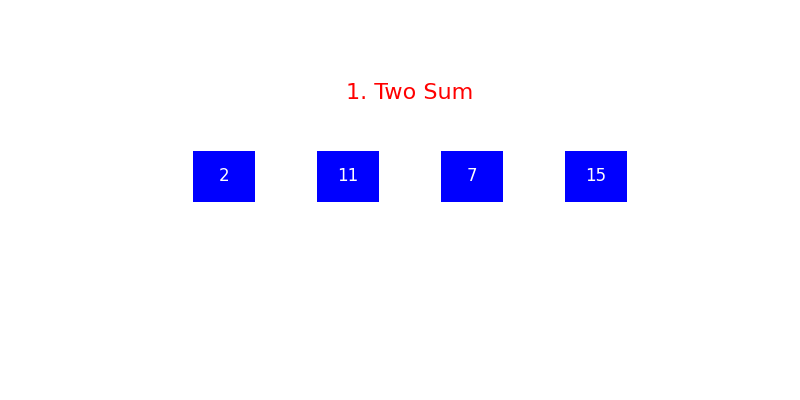

In [5]:
# 安装必要库（确保在Colab中运行）
!pip install imageio

import matplotlib.pyplot as plt
import imageio
import numpy as np

# 数据初始化
nums = [2, 11, 7, 15]
target = 22
frames = []  # 存储所有帧

def create_frame(highlight=None, success=False):
    """
    绘制一帧动画。
    :param highlight: 高亮的矩形索引 (tuple: (i, j))
    :param success: 是否找到目标组合，若为True则使用更突出的高亮方式
    """
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 2)
    ax.axis('off')

    # 绘制标题
    ax.text(1.5, 1.5, "1. Two Sum", color='red', fontsize=16, ha='center')

    # 绘制矩形和数字
    for i, num in enumerate(nums):
        if highlight and i in highlight:
            if success:
                color = 'red'  # 目标组合的高亮色
                edgecolor = 'yellow'  # 加边框颜色
                linewidth = 3  # 加粗边框
            else:
                color = 'green'  # 普通高亮色
                edgecolor = None
                linewidth = 1
        else:
            color = 'blue'  # 默认色
            edgecolor = None
            linewidth = 1

        rect = plt.Rectangle((i - 0.25, 0.5), 0.5, 0.5, color=color, ec=edgecolor, lw=linewidth)
        ax.add_patch(rect)
        ax.text(i, 0.75, str(num), color='white', fontsize=12, ha='center', va='center')

    # 如果是成功帧，添加说明文字
    if success:
        ax.text(1.5, 0.25, f"Found: {nums[highlight[0]]} + {nums[highlight[1]]} = {target}",
                color='red', fontsize=14, ha='center')

    # 保存当前帧到frames
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close(fig)

# 创建帧
create_frame()  # 初始帧
found = False
for i in range(len(nums)):
    for j in range(i + 1, len(nums)):
        create_frame(highlight=(i, j))  # 每一轮高亮比较的两个数字
        if nums[i] + nums[j] == target:
            create_frame(highlight=(i, j), success=True)  # 目标组合的高亮帧
            found = True
            break
    if found:
        break

# 保存为GIF
imageio.mimsave('/content/two_sum_highlight.gif', frames, fps=1)

# 在Colab中显示GIF
from IPython.display import Image
Image('/content/two_sum_highlight.gif')

<ipython-input-6-d0d7f73cc832>:64: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


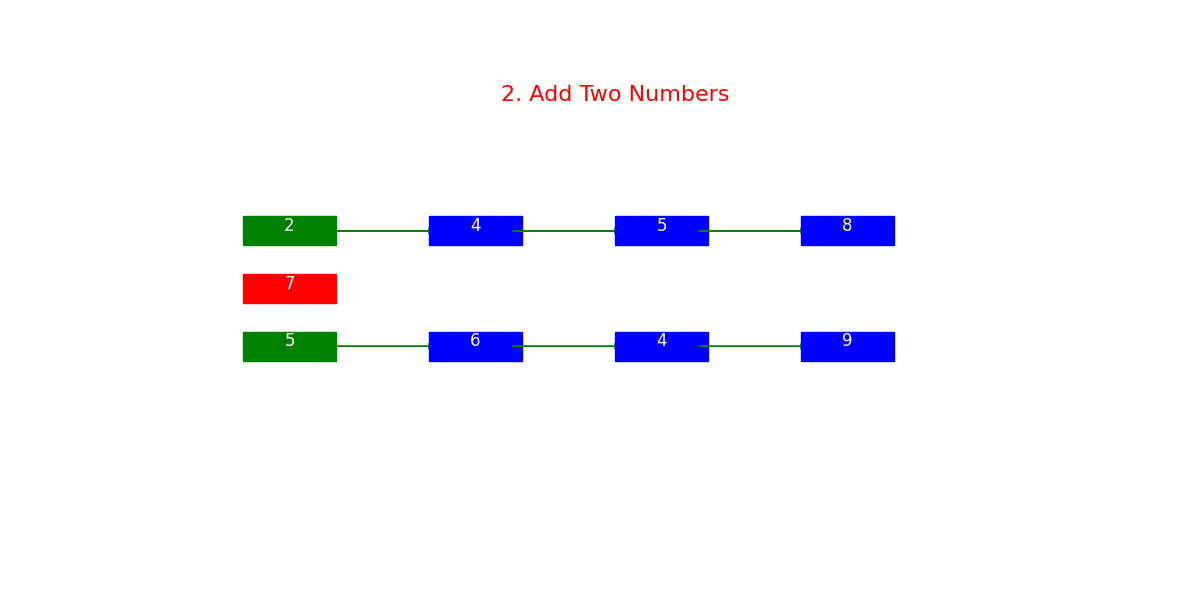

In [6]:
# 安装必要库
!pip install imageio

import matplotlib.pyplot as plt
import imageio
import numpy as np

# 数据初始化
list1 = [2, 4, 5, 8]
list2 = [5, 6, 4, 9]
frames = []  # 存储帧
carry = 0  # 进位
spacing = 2  # 节点之间的间距
result_list = []  # 存储相加结果的链表

def draw_frame(index, carry, show_carry_position=True):
    """
    绘制一帧
    :param index: 当前处理链表的索引
    :param carry: 当前的进位值
    :param show_carry_position: 是否显示进位的位置
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(-1, len(list1) * spacing + 1)
    ax.set_ylim(-4, 4)
    ax.axis('off')

    # 绘制标题
    ax.text((len(list1) * spacing) / 2, 3.5, "2. Add Two Numbers", color='red', fontsize=16, ha='center')

    # 绘制链表1
    for i, num in enumerate(list1):
        x_pos = i * spacing  # 调整节点位置以增加间距
        color = "green" if i == index else "blue"
        ax.add_patch(plt.Rectangle((x_pos, 1), 1, 0.5, color=color))
        ax.text(x_pos + 0.5, 1.25, str(num), color="white", fontsize=12, ha="center")
        if i < len(list1) - 1:
            ax.arrow(x_pos + 0.9, 1.25, spacing - 0.9, 0, head_width=0.1, head_length=0.2, fc="green", ec="green")

    # 绘制链表2
    for i, num in enumerate(list2):
        x_pos = i * spacing  # 调整节点位置以增加间距
        color = "green" if i == index else "blue"
        ax.add_patch(plt.Rectangle((x_pos, -1), 1, 0.5, color=color))
        ax.text(x_pos + 0.5, -0.75, str(num), color="white", fontsize=12, ha="center")
        if i < len(list2) - 1:
            ax.arrow(x_pos + 0.9, -0.75, spacing - 0.9, 0, head_width=0.1, head_length=0.2, fc="green", ec="green")

    # 显示当前进位
    if show_carry_position and carry > 0:
        x_pos = index * spacing + spacing / 2  # 显示在高位方向
        ax.text(x_pos, 0.5, f"Carry: {carry}", fontsize=12, color="orange", ha="center")

    # 绘制累积的结果链表
    for i, num in enumerate(result_list):
        x_pos = i * spacing  # 调整结果节点位置
        ax.add_patch(plt.Rectangle((x_pos, 0), 1, 0.5, color="red"))
        ax.text(x_pos + 0.5, 0.25, str(num), color="white", fontsize=12, ha="center")
        if i < len(result_list) - 1:
            ax.arrow(x_pos + 0.9, 0.25, spacing - 0.9, 0, head_width=0.1, head_length=0.2, fc="orange", ec="orange")

    # 保存当前帧
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close(fig)

# 模拟链表加法过程
for i in range(len(list1)):
    val1 = list1[i]
    val2 = list2[i]
    total = val1 + val2 + carry
    carry = total // 10
    sum_node = total % 10
    result_list.append(sum_node)  # 将结果累积至结果链表
    draw_frame(i, carry)

# 最后一帧：如果还有进位，补充一个节点
if carry > 0:
    result_list.append(carry)
    draw_frame(len(list1), 0)

# 保存为GIF
imageio.mimsave('/content/add_two_numbers_highlight.gif', frames, fps=1)

# 在Colab中显示GIF
from IPython.display import Image
Image('/content/add_two_numbers_highlight.gif')